# <center> EDA on Loan Data </center>

# Exploratory Data Analysis (EDA)

This notebook performs a detailed Exploratory Data Analysis (EDA) on the dataset provided. EDA is essential for understanding the structure, relationships, and potential issues in the data before proceeding to data preprocessing, feature engineering, and model building.

**Steps included in this EDA:**
1. General overview of the dataset.
2. Handling missing values.
3. Univariate analysis.
4. Bivariate analysis.
5. Multivariate analysis.
6. Correlation analysis.
7. Outlier detection.


## Import Libraries and load data

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
# Replace 'data.csv' with the path to your dataset file
data = pd.read_csv('LoanData.csv')

# Display the first few rows
data.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## 1. General Overview

In this step, we:
- Check the shape of the dataset.
- Display the column data types and counts of non-null values.
- Provide a summary of numeric columns.


In [5]:
# General overview
print("Shape of the dataset:", data.shape)
print("\nDataset Info:")
data.info()
print("\nSummary of numeric columns:")
data.describe()

# Checking for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())



Shape of the dataset: (614, 13)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB

Summary of numeric columns:

Missing values in each column:
Loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


## 2. Handling Missing Values

Missing data can skew analysis. Here we:
- Identify missing data.
- Decide how to handle it:
  - For categorical variables, fill with the mode.
  - For numerical variables, fill with the median.


In [12]:
# Filling missing categorical values with the mode
categorical_columns = ['Gender', 'Married', 'Dependents', 'Self_Employed']
for col in categorical_columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Filling missing numerical values with the median
numerical_columns = ['LoanAmount', 'Loan_Amount_Term', 'Credit_History']
for col in numerical_columns:
    data[col].fillna(data[col].median(), inplace=True)

# Verify missing values
print("Missing values after imputation:")
print(data.isnull().sum())


Missing values after imputation:
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


## 3. Univariate Analysis

This step focuses on analyzing individual features:
- Count plots for categorical variables.
- Histograms and boxplots for numerical variables.


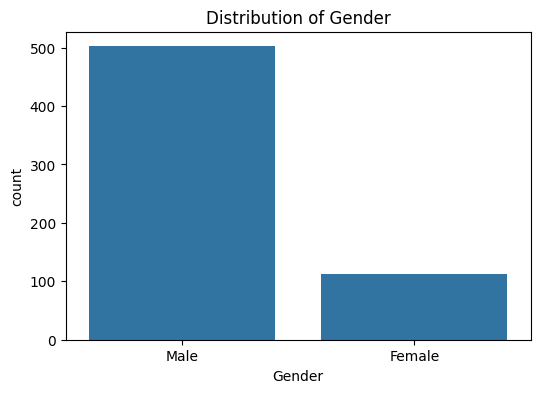

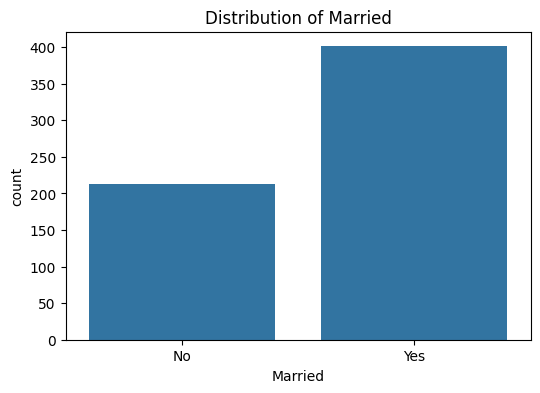

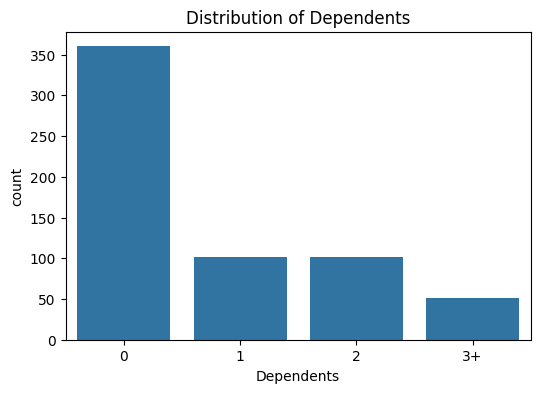

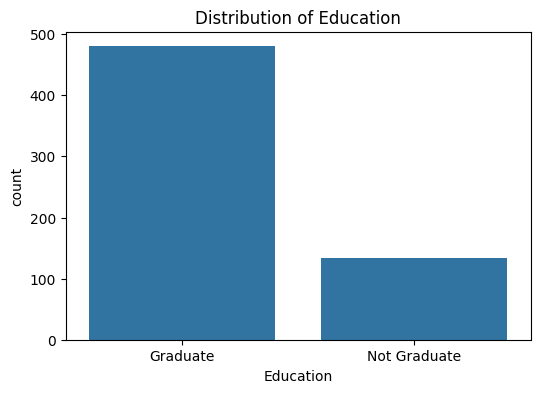

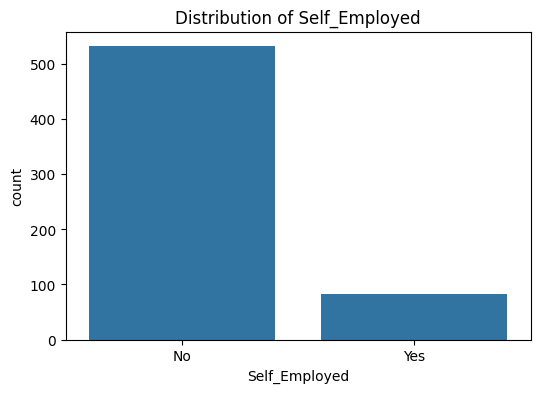

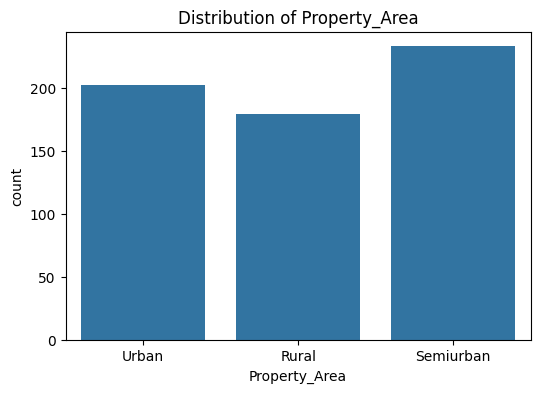

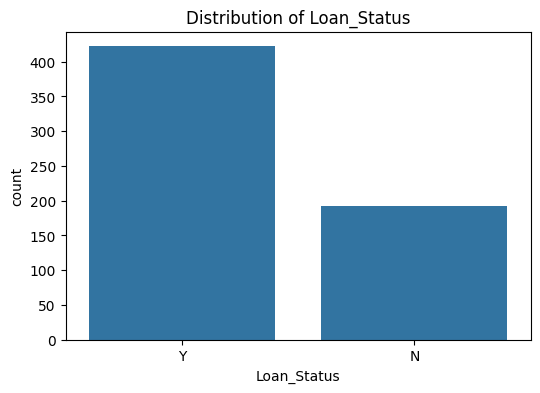

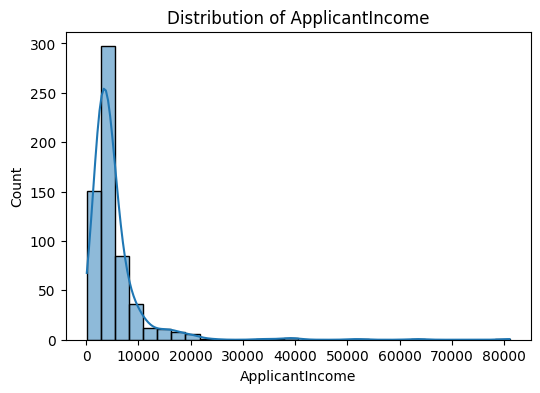

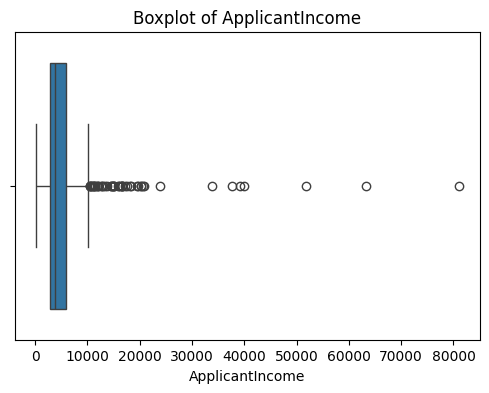

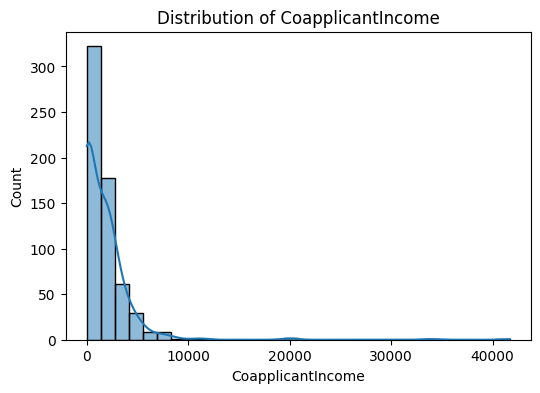

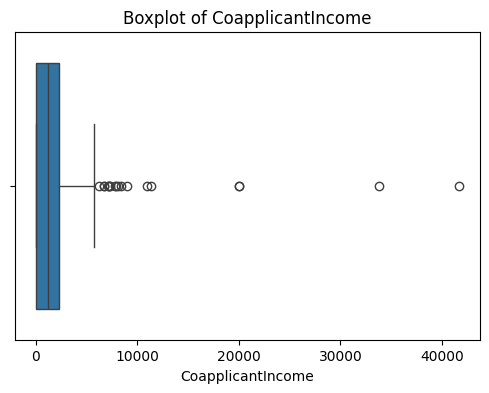

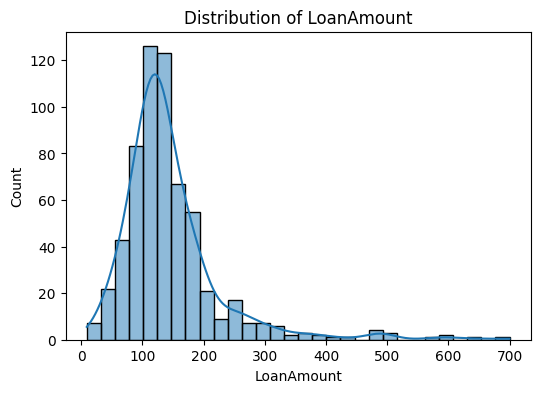

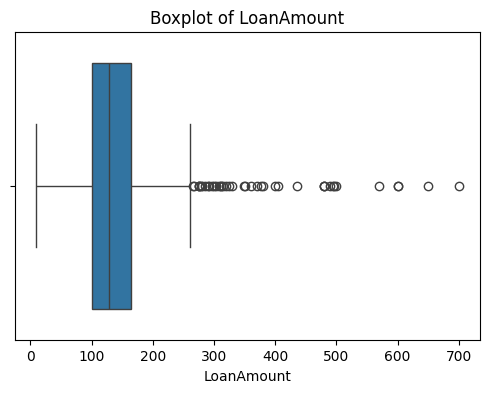

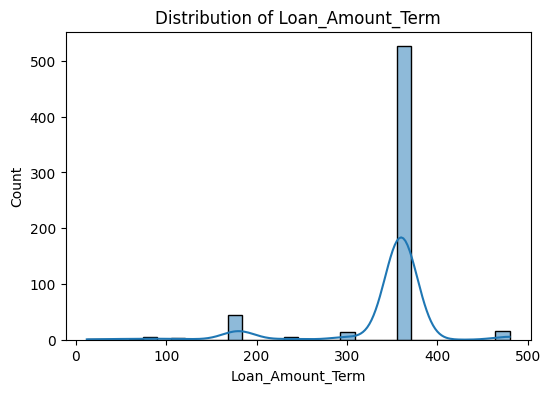

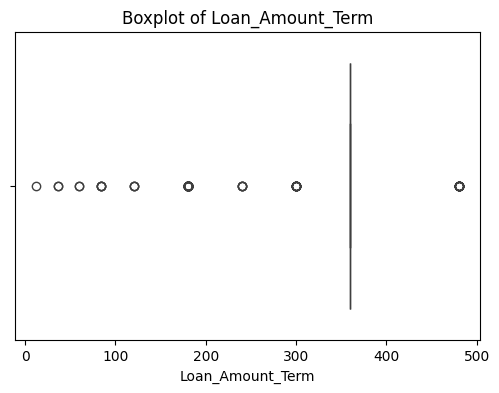

In [13]:
# Categorical variables
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
for col in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=data, x=col)
    plt.title(f'Distribution of {col}')
    plt.show()

# Numerical variables
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
for col in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

    plt.figure(figsize=(6, 4))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


## 4. Bivariate Analysis

Analyzing relationships between two variables:
- Categorical vs Categorical: Count plots.
- Numerical vs Categorical: Boxplots and Violin plots.


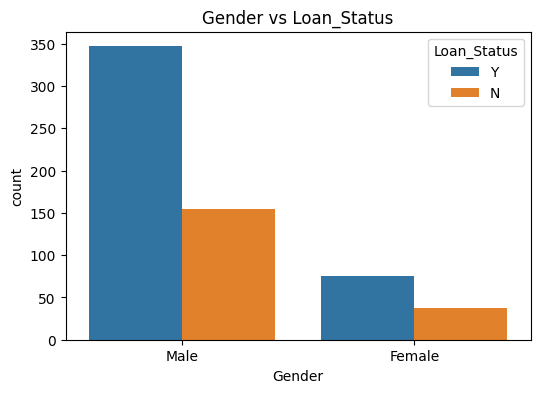

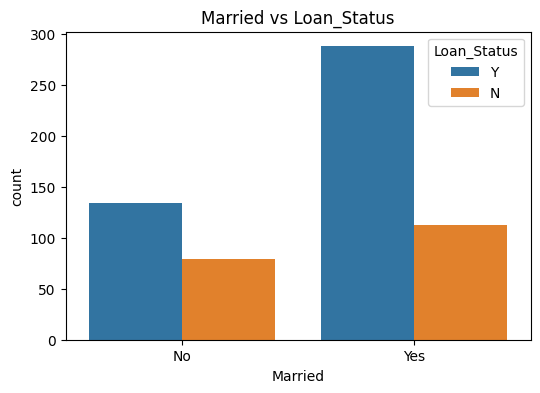

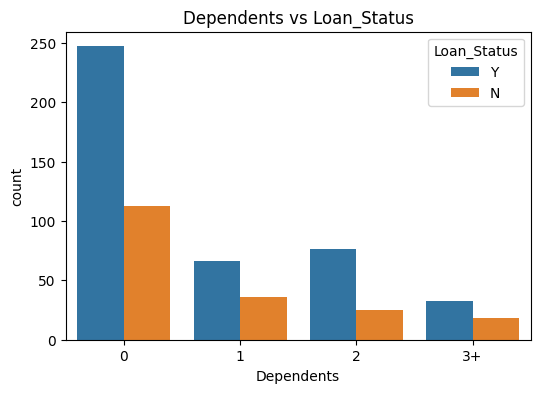

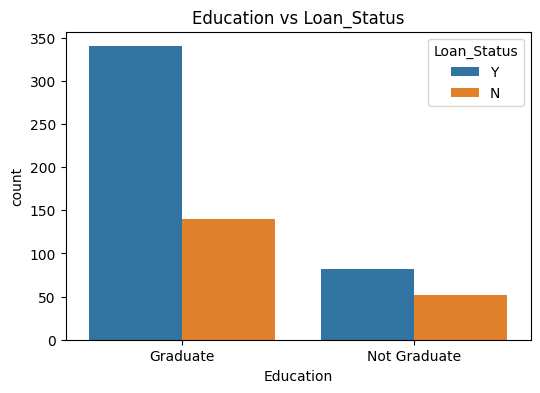

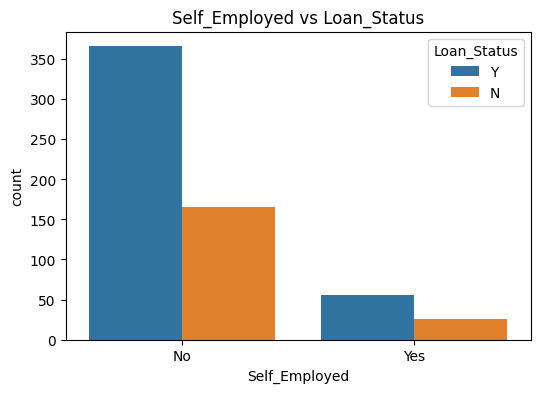

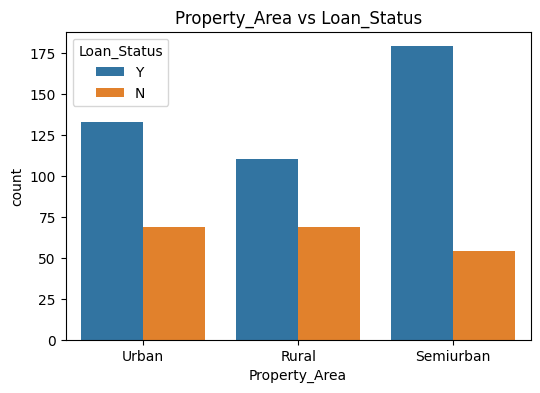

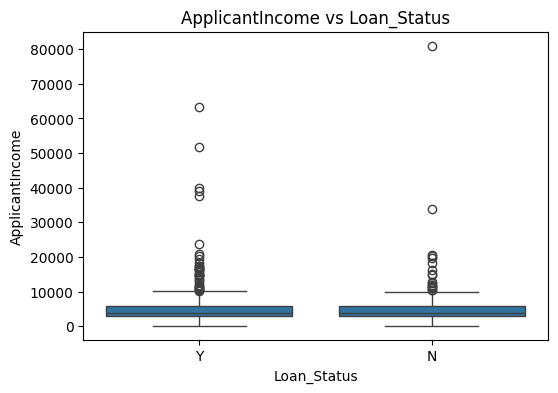

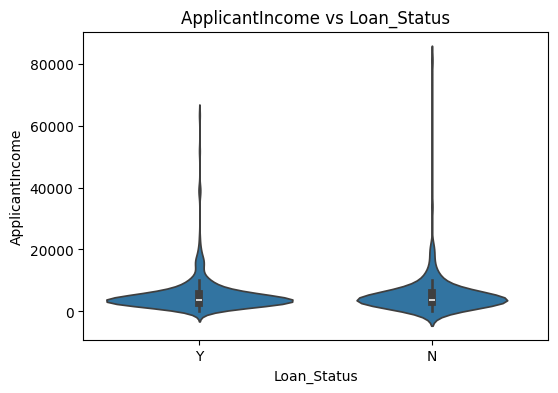

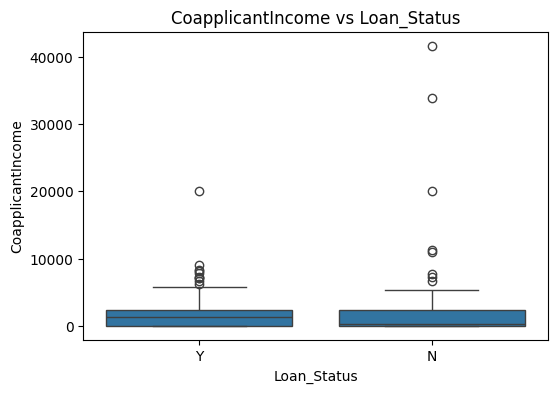

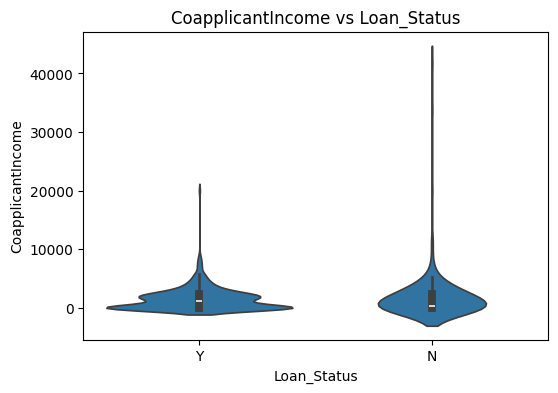

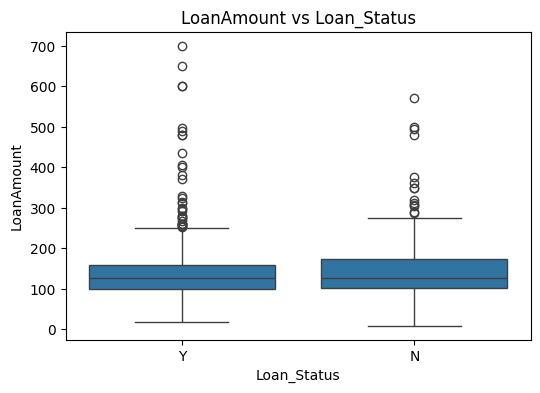

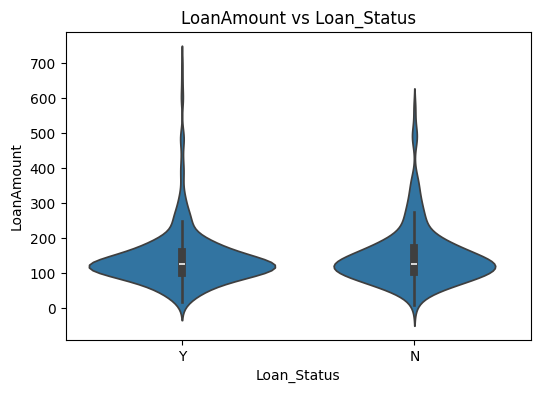

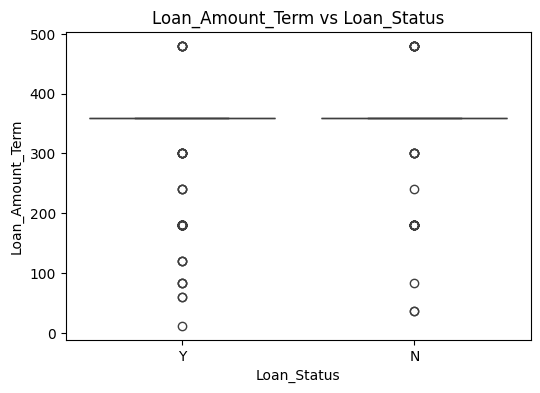

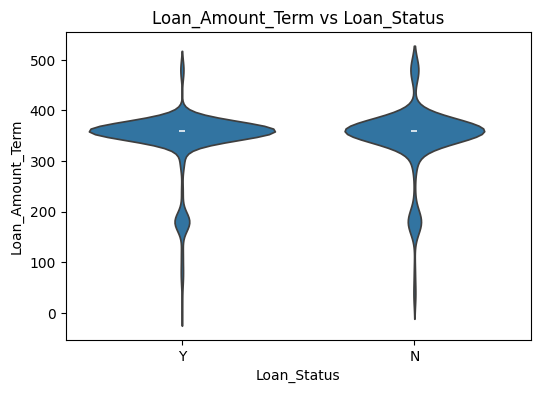

In [14]:
# Categorical vs Categorical
for col in categorical_features:
    if col != 'Loan_Status':  # Avoid plotting Loan_Status against itself
        plt.figure(figsize=(6, 4))
        sns.countplot(data=data, x=col, hue='Loan_Status')
        plt.title(f'{col} vs Loan_Status')
        plt.show()

# Numerical vs Categorical
for col in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=data, x='Loan_Status', y=col)
    plt.title(f'{col} vs Loan_Status')
    plt.show()

    plt.figure(figsize=(6, 4))
    sns.violinplot(data=data, x='Loan_Status', y=col)
    plt.title(f'{col} vs Loan_Status')
    plt.show()


## 5. Multivariate Analysis

Explore relationships involving more than two variables using:
- Pair plots for numerical variables.
- Heatmaps for correlations.


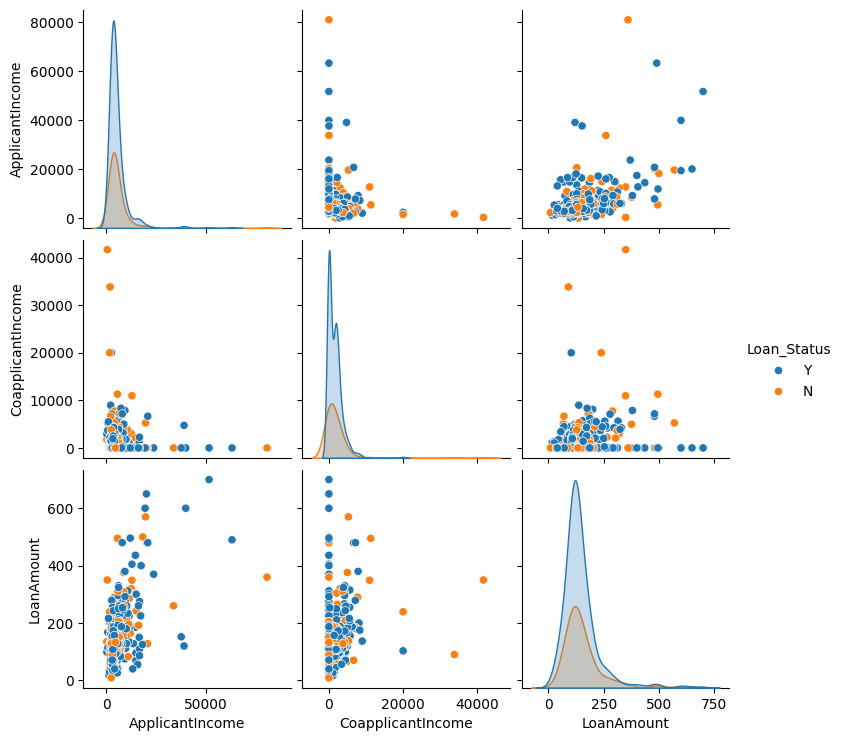

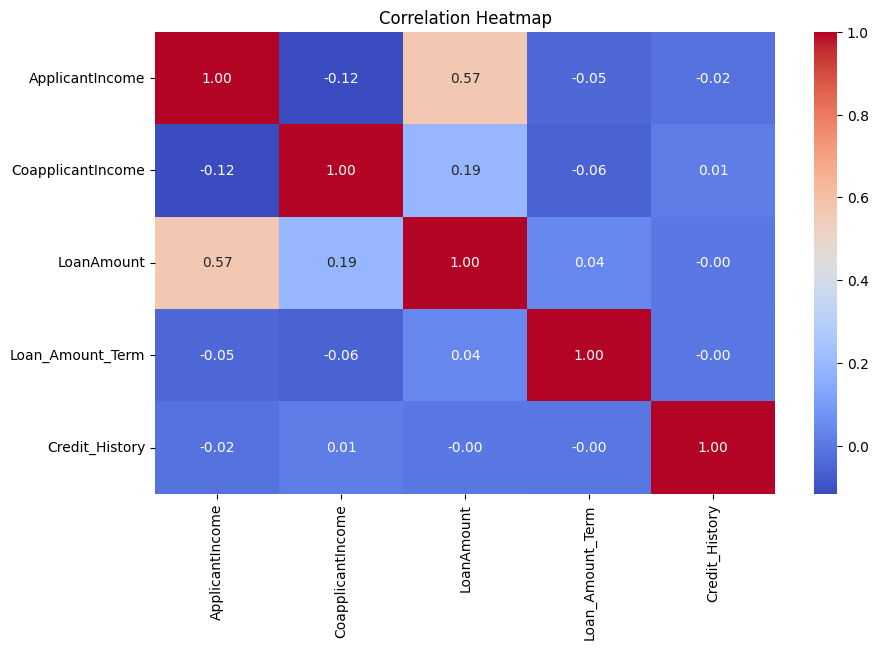

In [15]:
# Pair plot
sns.pairplot(data, hue='Loan_Status', vars=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'])
plt.show()

# Heatmap for correlations
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


## 6. Outlier Detection

Outliers can impact model performance. We use:
- Boxplots for visual inspection.
- Z-scores to identify extreme values.


In [16]:
# Detect outliers using Z-score
threshold = 3
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
for col in numerical_columns:
    data['Zscore'] = zscore(data[col])
    outliers = data[np.abs(data['Zscore']) > threshold]
    display(f"Outliers in {col}:\n", outliers)
    data.drop(columns=['Zscore'], inplace=True)


'Outliers in ApplicantIncome:\n'

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Zscore
126,LP001448,Male,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y,3.014310
155,LP001536,Male,Yes,3+,Graduate,No,39999,0.0,600.0,180.0,0.0,Semiurban,Y,5.667623
171,LP001585,Male,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y,7.594864
183,LP001637,Male,Yes,1,Graduate,No,33846,0.0,260.0,360.0,1.0,Semiurban,N,4.659607
185,LP001640,Male,Yes,0,Graduate,Yes,39147,4750.0,120.0,360.0,1.0,Semiurban,Y,5.528044
333,LP002101,Male,Yes,0,Graduate,No,63337,0.0,490.0,180.0,1.0,Urban,Y,9.490977
409,LP002317,Male,Yes,3+,Graduate,No,81000,0.0,360.0,360.0,0.0,Rural,N,12.384623
443,LP002422,Male,No,1,Graduate,No,37719,0.0,152.0,360.0,1.0,Semiurban,Y,5.294102


'Outliers in CoapplicantIncome:\n'

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Zscore
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N,3.196713
177,LP001610,Male,Yes,3+,Graduate,No,5516,11300.0,495.0,360.0,0.0,Semiurban,N,3.310261
402,LP002297,Male,No,0,Graduate,No,2500,20000.0,103.0,360.0,1.0,Semiurban,Y,6.285775
417,LP002342,Male,Yes,2,Graduate,Yes,1600,20000.0,239.0,360.0,1.0,Urban,N,6.285775
581,LP002893,Male,No,0,Graduate,No,1836,33837.0,90.0,360.0,1.0,Urban,N,11.018211
600,LP002949,Female,No,3+,Graduate,No,416,41667.0,350.0,180.0,1.0,Urban,N,13.696173


'Outliers in LoanAmount:\n'

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Zscore
130,LP001469,Male,No,0,Graduate,Yes,20166,0.0,650.0,480.0,1.0,Urban,Y,6.000182
155,LP001536,Male,Yes,3+,Graduate,No,39999,0.0,600.0,180.0,0.0,Semiurban,Y,5.405218
171,LP001585,Male,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y,6.595146
177,LP001610,Male,Yes,3+,Graduate,No,5516,11300.0,495.0,360.0,0.0,Semiurban,N,4.155794
278,LP001907,Male,Yes,0,Graduate,No,14583,0.0,436.0,360.0,1.0,Semiurban,Y,3.453736
308,LP001996,Male,No,0,Graduate,No,20233,0.0,480.0,360.0,1.0,Rural,N,3.977305
333,LP002101,Male,Yes,0,Graduate,No,63337,0.0,490.0,180.0,1.0,Urban,Y,4.096297
369,LP002191,Male,Yes,0,Graduate,No,19730,5266.0,570.0,360.0,1.0,Rural,N,5.048240
432,LP002386,Male,No,0,Graduate,No,12876,0.0,405.0,360.0,1.0,Semiurban,Y,3.084859
487,LP002547,Male,Yes,1,Graduate,No,18333,0.0,500.0,360.0,1.0,Urban,N,4.215290


Hello
